![](https://www.assignmentpoint.com/wp-content/uploads/2017/05/About-Malaria.jpg)
# KDD - Policy Learning for Malaria Control

In [1]:
from sys import exit, exc_info, argv
import numpy as np
import pandas as pd

!pip3 install git+https://github.com/slremy/netsapi --user --upgrade

from netsapi.challenge import *
from netsapi.visualisation import *
from collections import defaultdict
import math

  Cloning https://github.com/slremy/netsapi to /private/var/folders/qj/6zzv4hhx5fzbkm01x5qr69800000gn/T/pip-req-build-r2jwrmco
  Running command git clone -q https://github.com/slremy/netsapi /private/var/folders/qj/6zzv4hhx5fzbkm01x5qr69800000gn/T/pip-req-build-r2jwrmco
  Stored in directory: /private/var/folders/qj/6zzv4hhx5fzbkm01x5qr69800000gn/T/pip-ephem-wheel-cache-zu2wocii/wheels/9e/73/c9/86a9cc2460e11b3ce5b0a5ebd2d9d332a68afe0941659967fa
Successfully built netsapi
  Found existing installation: netsapi 1.1
    Uninstalling netsapi-1.1:
      Successfully uninstalled netsapi-1.1


# Ramdom

In [32]:
from netsapi.challenge import *

class CustomAgent:
    def __init__(self, environment):
        self.environment = environment

    def generate(self):
        best_policy = None
        best_reward = -float('Inf')
        candidates = []
        try:
            # Agents should make use of 20 episodes in each training run, if making sequential decisions
            for i in range(20):
                self.environment.reset()
                policy = {}
                for j in range(5): #episode length
                    x = 0
                    y = 0
                    ran = random.random()
                    if ran > 0.5:
                        x = 1
                    else:
                        y = 1
                    policy[str(j+1)]=[x, y]
                candidates.append(policy)
                
            rewards = self.environment.evaluatePolicy(candidates)
            best_policy = candidates[np.argmax(rewards)]
            best_reward = rewards[np.argmax(rewards)]
        
        except (KeyboardInterrupt, SystemExit):
            print(exc_info())
            
        return best_policy, best_reward

# Q-Learning(20 episodes)

In [ ]:
env = ChallengeSeqDecEnvironment()

Q = defaultdict(lambda : 0.) # Q-function
n = defaultdict(lambda : 1.) # number of visits
def actionSpace(resolution):
    x,y = np.meshgrid(np.arange(0,1+resolution,resolution), np.arange(0,1+resolution,resolution))
    xy = np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)
    return xy.round(2).tolist()

#HyperParameters
action_resolution = 1
epsilon = 1
learning_rate = 1

gamma = 0.8
episode_number = 20 #for submission this is fixed as 20

#Set-up
actions = actionSpace(action_resolution)
actionspace = range(len(actions)-1)
greedy_action = lambda s : max(actionspace, key=lambda a : Q[(s,a)])
max_q = lambda sp : max([Q[(sp,a)] for a in actionspace])
count = 0

policies = []
rewards = []
#Training of Q Table

loop = 0;

print(Q)

env = ChallengeSeqDecEnvironment()
for _ in range(episode_number):
    env.reset()
    nextstate = env.state
    epsilon = math.log((20 - i),20)
    learning_rate = math.log((20 - i),20)
    while True:
        state = nextstate
        # Epsilon-Greedy
        if epsilon > random.random() :
            action = random.choice(actionspace)
            print('random_action',action)
            while action == 0:
                action = random.choice(actionspace)
                print('random_action',action)
        else :
            action = greedy_action(state)

        env_action = actions[action] #convert to ITN/IRS
        print('env_action', env_action)
        nextstate, reward, done, _ = env.evaluateAction(env_action)


        # epsilon = epsilon * 0.8
        # Q-learning
        """
        if done :
            Q[(state,action)] = Q[(state,action)] + 1./n[(state,action)] * ( reward - Q[(state,action)] )
            break
        else :
            Q[(state,action)] = Q[(state,action)] + 1./n[(state,action)] * ( reward + gamma * max_q(nextstate) - Q[(state,action)] )
        """
        if done :
            Q[(state,action)] = Q[(state,action)] + learning_rate * ( reward - Q[(state,action)] )
            break
        else :
            Q[(state,action)] = Q[(state,action)] + learning_rate * ( reward + gamma * max_q(nextstate) - Q[(state,action)] )
    loop = 0
#Greedy Policy Learnt from Q Table
best_policy = {state: list(actions[greedy_action(state)]) for state in range(1,6)}
best_reward = env.evaluatePolicy(best_policy)
print("best policy: ", best_policy)
print("best reward: ", best_reward)

# Q learning(400 episodes)

In [ ]:
from collections import defaultdict
import math
env = ChallengeSeqDecEnvironment()

Q = defaultdict(lambda : 0.) # Q-function
n = defaultdict(lambda : 1.) # number of visits
def actionSpace(resolution):
    x,y = np.meshgrid(np.arange(0,1+resolution,resolution), np.arange(0,1+resolution,resolution))
    xy = np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)
    return xy.round(2).tolist()

#HyperParameters
action_resolution = 1
epsilon = 1
learning_rate = 1

gamma = 0.8
episode_number = 20 #for submission this is fixed as 20

flag = 0
x=[]
y=[]

#Set-up
actions = actionSpace(action_resolution)
actionspace = range(len(actions)-1)
greedy_action = lambda s : max(actionspace, key=lambda a : Q[(s,a)])
max_q = lambda sp : max([Q[(sp,a)] for a in actionspace])
count = 0

policies = []
rewards = []
#Training of Q Table

loop = 0;

print(Q)

for i in range(20):
    env = ChallengeSeqDecEnvironment()
    epsilon = math.log((20 - i),20)
    learning_rate = math.log((20 - i),20)
    for _ in range(episode_number):
        env.reset()
        nextstate = env.state
    
        while True:
            state = nextstate
            print(state)
            # Epsilon-Greedy
            if epsilon > random.random() :
                action = random.choice(actionspace)
                while action == 0:
                    action = random.choice(actionspace)
            else :
                action = greedy_action(state)

            env_action = actions[action] #convert to ITN/IRS
            
            nextstate, reward, done, _ = env.evaluateAction(env_action)


            # epsilon = epsilon * 0.8
            # Q-learning
            """
            if done :
                Q[(state,action)] = Q[(state,action)] + 1./n[(state,action)] * ( reward - Q[(state,action)] )
                break
            else :
                Q[(state,action)] = Q[(state,action)] + 1./n[(state,action)] * ( reward + gamma * max_q(nextstate) - Q[(state,action)] )
            """
            if done :
                Q[(state,action)] = Q[(state,action)] + learning_rate * ( reward - Q[(state,action)] )
                break
            else :
                Q[(state,action)] = Q[(state,action)] + learning_rate * ( reward + gamma * max_q(nextstate) - Q[(state,action)] )
        loop = 0
    #Greedy Policy Learnt from Q Table
    best_policy = {state: list(actions[greedy_action(state)]) for state in range(1,6)}
    best_reward = env.evaluatePolicy(best_policy)
    print(i, "   best policy: ", best_policy)
    print(i, "   best reward: ", best_reward)

### Result of action with only 0 and 1
* action_space: [1,0], [0,1], [1,1]
* episode: 400
* epilson: decrease with log function in every 20 episodes
* learning rate: decrease with log function in every 20 episodes
    * 1: [1, 0], 2: [1, 0], 3: [0, 1], 4: [1, 0], 5: [1, 0] reward:  290.38428422297835
    * 1: [1, 0], 2: [1, 0], 3: [0, 1], 4: [1, 0], 5: [0, 1] reward:  380.4947815786916
    * 1: [0, 1], 2: [1, 0], 3: [0, 1], 4: [0, 1], 5: [0, 1] reward:  310.4222612388195
    * 1: [0, 1], 2: [0, 1], 3: [1, 0], 4: [0, 1], 5: [0, 1] reward:  289.68138203850805
    * 1: [0, 1], 2: [0, 1], 3: [0, 1], 4: [0, 1], 5: [0, 1] reward:  100.98415845361772
    * 1: [1, 0], 2: [0, 1], 3: [1, 0], 4: [0, 1], 5: [1, 0] reward:  507.39432718505
    * 1: [0, 1], 2: [0, 1], 3: [0, 1], 4: [0, 1], 5: [0, 1] reward:  107.456920538027
    * 1: [0, 1], 2: [1, 0], 3: [1, 0], 4: [1, 0], 5: [0, 1] reward:  284.539203249
    * 1: [0, 1], 2: [0, 1], 3: [1, 0], 4: [0, 1], 5: [1, 0] reward:  396.61007373110783
    * 1: [0, 1], 2: [1, 0], 3: [0, 1], 4: [0, 1], 5: [0, 1] reward:  301.1612033793719
    * 1: [1, 0], 2: [1, 0], 3: [0, 1], 4: [0, 1], 5: [0, 1] reward:  203.21671681443354

### Result of action with only 0.1, 0.2 ... 0.9
* epilson: decrease with log function in every 20 episodes
* learning rate: decrease with log function in every 20 episodes
* 400 episodes:
    * 1. 1: [0.0, 1.0], 2: [0.0, 0.8], 3: [0.6, 1.0], 4: [0.6, 0.2], 5: [0.2, 1.0] reward:  238.39749209559704
    * 2. 1: [0.0, 0.0], 2: [1.0, 0.0], 3: [0.0, 1.0], 4: [0.0, 1.0], 5: [1.0, 0.0]  reward: 275.7056501400423
    * 3. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [1.0, 0.8], 4: [0.2, 1.0], 5: [1.0, 0.0]  reward: 214.04778368407133
    * 4. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [1.0, 0.8], 4: [0.6, 0.8], 5: [1.0, 0.8]  reward: 118.22924200612545
    * 5. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [1.0, 0.0], 4: [0.2, 0.6], 5: [0.2, 0.8]  reward: 244.96143603160485
    * 6. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [0.8, 1.0], 4: [1.0, 0.8], 5: [0.2, 0.8]  reward: 195.14691152695116
    * 7. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [0.0, 1.0], 4: [1.0, 0.2], 5: [0.2, 0.8]  reward: 293.3403378106123
    * 8. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [1.0, 0.2], 4: [0.0, 1.0], 5: [0.4, 1.0]  reward: 316.0620046181816
    * 9. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [0.4, 1.0], 4: [0.8, 1.0], 5: [0.0, 0.8]  reward:  92.6610205695417
    * 10. 1: [0.0, 0.0], 2: [0.0, 1.0], 3: [0.6, 0.8], 4: [0.0, 0.4], 5: [0.0, 0.8] reward: 181.9161010971461
    * 11. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [0.0, 0.6], 4: [0.0, 1.0], 5: [0.0, 1.0] reward: 180.06330943710924
    * 12. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [0.8, 0.6], 4: [0.6, 0.8], 5: [0.0, 1.0] reward: 177.9460785941661
    * 13. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [1.0, 0.2], 4: [0.6, 0.2], 5: [0.0, 0.4] reward: 247.65675260035763
    * 14. 1: [0.0, 0.0], 2: [0.0, 1.0], 3: [0.0, 0.0], 4: [0.2, 1.0], 5: [1.0, 0.0] reward: 210.93517170027584
    * 15. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [1.0, 0.0], 4: [0.8, 1.0], 5: [0.6, 1.0] reward: 296.3390697712953
    * 16. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [0.8, 1.0], 4: [0.2, 0.8], 5: [0.8, 0.8] reward: 216.53564725470096
    * 17. 1: [0.0, 0.0], 2: [0.0, 0.8], 3: [0.6, 0.0], 4: [0.0, 0.2], 5: [0.8, 1.0] reward: 158.880221010863
    * 18. 1: [0.0, 0.0], 2: [0.0, 1.0], 3: [0.8, 0.0], 4: [0.0, 1.0], 5: [0.8, 0.0] reward: 325.7876095759
    * 19. 1: [0.0, 0.0], 2: [0.0, 1.0], 3: [0.8, 0.0], 4: [0.0, 1.0], 5: [0.8, 0.0] reward: 323.4814867120278
    * 20. 1: [0.0, 0.0], 2: [0.0, 1.0], 3: [0.8, 0.0], 4: [0.0, 1.0], 5: [0.8, 0.0] reward: 307.6462137758748

Text(0.5, 0, 'episode')

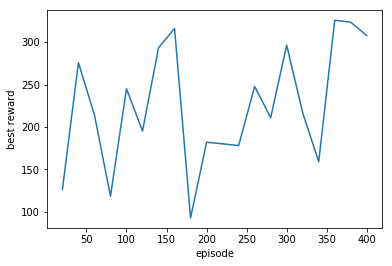

In [39]:
# graph of reward of 400 episode
import matplotlib.pyplot as plt

x = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]
y = [126.21, 275.70, 214.04, 118.22, 244.96, 195.14, 293.34, 316.06, 92.66, 181.91, 180.06, 177.94, 247.65, 210.93, 296.33, 216.53, 158.88, 325.78, 323.481, 307.64]

plt.plot(x, y)
plt.ylabel('best reward')
plt.xlabel('episode')


# Q learning(800 episodes)

In [21]:
env = ChallengeSeqDecEnvironment()

Q = defaultdict(lambda : 0.) # Q-function
n = defaultdict(lambda : 1.) # number of visits

def actionSpace(resolution):
    x,y = np.meshgrid(np.arange(0,1+resolution,resolution), np.arange(0,1+resolution,resolution))
    xy = np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)
    return xy.round(2).tolist()

#HyperParameters
action_resolution = 0.1
epsilon = 1
learning_rate = 1

gamma = 0.8
episode_number = 20 #for submission this is fixed as 20

flag = 0
x=[]
y=[]

#Set-up
actions = actionSpace(action_resolution)
actionspace = range(len(actions)-1)
greedy_action = lambda s : max(actionspace, key=lambda a : Q[(s,a)])
max_q = lambda sp : max([Q[(sp,a)] for a in actionspace])
count = 0

policies = []
rewards = []
#Training of Q Table

#print(Q)

for i in range(40):
    env = ChallengeSeqDecEnvironment()
    epsilon = math.log((40 - i),40)
    learning_rate = math.log((40 - i),40)
    for _ in range(episode_number):
        env.reset()
        nextstate = env.state
        # epsilon = math.log((20-i),20) + 0.2
        # if epsilon < 0:
        #     epsilon = 0.2
        # elif epsilon > 1:
        #     epsilon = 1
        # learning_rate = math.log((20-i),20) + 0.2
        # if learning_rate < 0:
        #     learning_rate = 0.2
        # if learning_rate > 1:
        #     learning_rate = 1

        while True:
            state = nextstate
            # Epsilon-Greedy
            if epsilon > random.random() :
                action = random.choice(actionspace)
                #print('random_action',action)
                while action == 0:
                    action = random.choice(actionspace)
            else :
                action = greedy_action(state)

            env_action = actions[action] #convert to ITN/IRS
            #print('env_action', env_action)
            nextstate, reward, done, _ = env.evaluateAction(env_action)


            # epsilon = epsilon * 0.8
            # Q-learning
            """
            if done :
                Q[(state,action)] = Q[(state,action)] + 1./n[(state,action)] * ( reward - Q[(state,action)] )
                break
            else :
                Q[(state,action)] = Q[(state,action)] + 1./n[(state,action)] * ( reward + gamma * max_q(nextstate) - Q[(state,action)] )
            """
            if done :
                Q[(state,action)] = Q[(state,action)] + learning_rate * ( reward - Q[(state,action)] )
                break
            else :
                Q[(state,action)] = Q[(state,action)] + learning_rate * ( reward + gamma * max_q(nextstate) - Q[(state,action)] )

    #Greedy Policy Learnt from Q Table
    best_policy = {state: list(actions[greedy_action(state)]) for state in range(1,6)}
    best_reward = env.evaluatePolicy(best_policy)
    print(i, "    best policy: ", best_policy)
    print(i, "    best reward: ", best_reward)



105  Evaluations Remaining
104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Ev

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

104  Evaluations Remaining
103  Evaluations Remaining
102  Evaluations Remaining
101  Evaluations Remaining
100  Evaluations Remaining
99  Evaluations Remaining
98  Evaluations Remaining
97  Evaluations Remaining
96  Evaluations Remaining
95  Evaluations Remaining
94  Evaluations Remaining
93  Evaluations Remaining
92  Evaluations Remaining
91  Evaluations Remaining
90  Evaluations Remaining
89  Evaluations Remaining
88  Evaluations Remaining
87  Evaluations Remaining
86  Evaluations Remaining
85  Evaluations Remaining
84  Evaluations Remaining
83  Evaluations Remaining
82  Evaluations Remaining
81  Evaluations Remaining
80  Evaluations Remaining
79  Evaluations Remaining
78  Evaluations Remaining
77  Evaluations Remaining
76  Evaluations Remaining
75  Evaluations Remaining
74  Evaluations Remaining
73  Evaluations Remaining
72  Evaluations Remaining
71  Evaluations Remaining
70  Evaluations Remaining
69  Evaluations Remaining
68  Evaluations Remaining
67  Evaluations Remaining
66  Eva

Text(0, 0.5, 'reawrd')

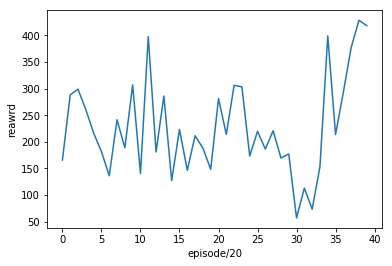

In [37]:
# graph of reward with 800 episode
reward = [165.87, 288.21, 298.80, 260.23, 216.45, 181.70, 136.50, 241.39, 188.90, 307.02, 140.50, 
          397.29, 181.01, 285.99, 127.18, 223.42, 146.63, 211.45, 188.31, 148.41, 281.15, 214.03, 
          306.17, 303.07, 173.38, 219.92, 186.44, 220.80, 169.65, 177.25, 57.25, 113.10, 73.60, 
          153.50, 398.80, 213.83, 293.35, 377.15, 428.18, 417.90]
import matplotlib.pyplot as plt

plt.plot(reward)
plt.xlabel('episode/20')
plt.ylabel('reawrd')

Text(0, 0.5, 'epsilon & learning rate')

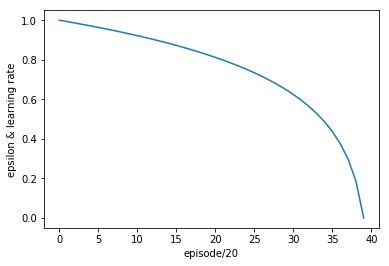

In [38]:
# graph of epsilon and learning rate VS episode of reward with 800 episode
y = [0]*40
for i in range(40):
    y[i] = math.log((40 - i),40)
plt.plot(y)
plt.xlabel('episode/20')
plt.ylabel('epsilon & learning rate')